### 1. Importing and Reading Images

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('example.jpg')   # Reads an image

* `cv2.imread` → like opening a photo from a photo album.
* Computer stores it as a grid of tiny dots called **pixels**.
* Each pixel has 3 numbers → (Blue, Green, Red).

### 2. Showing Images

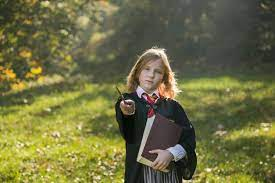

In [5]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

* Think of `imshow` like putting the photo on a projector.
* `waitKey(0)` = “pause until I press a key.”
* `destroyAllWindows` = “close the projector screen.”


In [27]:
def show(img, title=None, cmap=None):
    if img is None:
        raise ValueError("Image is None. Check your path or generation step.")
    if len(img.shape) == 3 and img.shape[2] == 3:
        img_disp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_disp = img
    plt.figure(figsize=(5,5))
    plt.imshow(img_disp, cmap=cmap)
    if title: plt.title(title)
    plt.axis('off')
    plt.show()

### 3. Color Spaces (BGR → Gray, HSV)

In [31]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

* BGR = Color photo.
* Gray = Black & White photo, only brightness.
* HSV = like **makeup kit**:

  * H = color type (red, blue, green…)
  * S = how strong the color is.
  * V = how bright it is.

### 4. Drawing Shapes

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [ 40,  45,  43],
        [ 40,  45,  44],
        [ 40,  45,  44]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [ 45,  52,  49],
        [ 46,  51,  50],
        [ 46,  51,  50]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [ 52,  58,  57],
        [ 52,  58,  57],
        [ 52,  58,  57]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [ 13,  83,  83],
        ...,
        [ 31,  59,  59],
        [ 28,  53,  49],
        [ 20,  45,  41]],

       [[  0, 255,   0],
        [ 29, 112, 110],
        [  0, 255,   0],
        ...,
        [ 30,  58,  58],
        [ 27,  52,  48],
        [ 20,  45,  41]],

       [[ 30, 119, 116],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 28,  59,  58],
        [ 27,  52,  48],
        [ 19,  44,  40]]], dtype=uint8)
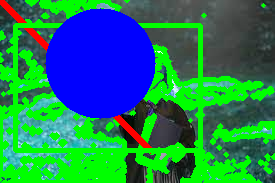

In [32]:
cv2.line(img, (0,0), (150,150), (255,0,0), 5)
cv2.rectangle(img, (15,25), (200,150), (0,255,0), 3)
cv2.circle(img, (100,63), 55, (0,0,255), -1)

* Like drawing doodles on a photo with colored markers.
* Line, rectangle, circle → all drawn with pixel coordinates.

### 5. Region of Interest (ROI)

In [33]:
roi = img[100:200, 100:200]  # crop part of the image

* Just like cutting a small square piece out of a printed photo.

### 6. Transformations (Resize, Rotate, Flip)

In [34]:
resized = cv2.resize(img, (300,300))
flipped = cv2.flip(img, 1)  # mirror

* Resize → like zooming in/out.
* Flip → like looking into a mirror.

### 7. Filtering / Blurring

In [35]:
blur = cv2.GaussianBlur(img, (5,5), 0)

* Blur → like smudging with finger → removes noise.

### 8. Edge Detection (Canny)

In [36]:
edges = cv2.Canny(gray, 100, 200)

* Finds where the picture changes a lot (dark → bright).
* Like outlining the borders with a pen.


### 9. Thresholding

In [37]:
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


* If pixel is brighter than 127 → make it white.
* Else → black.
* Like coloring all light spots white, all dark spots black.

### 10. Morphological Operations

In [38]:
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

* Used to clean noisy black & white images.
* Like erasing small dust spots from a photo.


### 11. Contours

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [ 40,  45,  43],
        [ 40,  45,  44],
        [ 40,  45,  44]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [ 45,  52,  49],
        [ 46,  51,  50],
        [ 46,  51,  50]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [ 52,  58,  57],
        [ 52,  58,  57],
        [ 52,  58,  57]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 31,  59,  59],
        [ 28,  53,  49],
        [ 20,  45,  41]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 30,  58,  58],
        [ 27,  52,  48],
        [ 20,  45,  41]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 28,  59,  58],
        [ 27,  52,  48],
        [ 19,  44,  40]]], dtype=uint8)
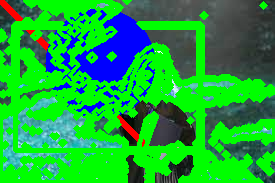

In [39]:
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0,255,0), 3)

* Contours are like outlines of shapes (like borders).
* Think of tracing shapes with a green pen.

### 12. Feature Detection (Corners)

In [15]:
corners = cv2.goodFeaturesToTrack(gray, 25, 0.01, 10)

* Finds “sharp edges” like window corners.
* Imagine a building photo → detects all corner points.

In [16]:
### 13. Template Matching

In [18]:
# Define a placeholder template (replace with your actual template image)
# For example, if you have a small image file named 'template.jpg':
# template = cv2.imread('template.jpg', 0) # Read as grayscale

# For demonstration, create a small dummy template
template = np.zeros((10, 10), dtype=np.uint8)

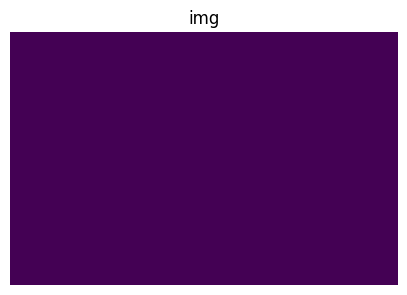

In [28]:
res = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)
show(res,"img")

* Like “Find this small photo inside a big photo.”
* Example: finding a logo inside a full page image.